# 1

### D

# 2

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import PolynomialFeatures

In [2]:
F1=np.array([5,6,8,10,4])
F2=np.array([200,150,300,185,225])
F3=np.array([50,60,80,25,40])

In [3]:
F1_minmax=(F1-min(F1))/(max(F1)-min(F1))
F1_minmax

array([0.16666667, 0.33333333, 0.66666667, 1.        , 0.        ])

In [4]:
F1_robust=(F1-np.median(F1))/(np.quantile(F1,0.75)-np.quantile(F1,0.25))
F1_robust

array([-0.33333333,  0.        ,  0.66666667,  1.33333333, -0.66666667])

# 3

In [5]:
def return_gradient(x1,x2):
    fdx1 = 4*x1**3 + 4*x2
    fdx2 = 4*x1 + 2 + x2
    return np.array([fdx1,fdx2])

In [6]:
def gradient_descent(x1,x2, eta, max_iter=100):
    for i in range(max_iter):
        grad_f = return_gradient(x1,x2)
        x1, x2 = np.array([x1,x2]) - grad_f*eta
    return "After {0} iterations the value is {1} and the gradient is {2}".format(i+1, (x1, x2), grad_f)
gradient_descent(1,1,0.01, 100)

'After 100 iterations the value is (1.467321945319173, -3.343911663909736) and the gradient is [-0.75003398  4.54078258]'

In [7]:
def  eta_const(t,c):
    return c

In [8]:
def eta_sqrt(t, c):
    return c/((t+1)**(1/2))

In [9]:
def eta_multistep(t, milestones:list,eta_init, c=0.1):
    if t<milestones[0]:
        c = eta_init
    if milestones[0]<=t<milestones[1]:
        c = eta_init*c
    if milestones[1]<=t<milestones[2]:
        c = eta_init*c*c
    else:
        c = eta_init*c*c*c
    return c

In [10]:
def gradient_descent_const_step(x1,x2, eta, max_iter=100):
        for i in range(max_iter):
            grad_f = return_gradient(x1,x2)
            x1, x2 = np.array([x1,x2]) - grad_f*eta_const(i,eta)
            eta = eta_const(i, eta)
        y = x1**4+4*x1*x2+2*x2+(1/2)*x2**2
        return y
gradient_descent_const_step(1,1,0.01, 100)

-16.087776514949777

In [11]:
def gradient_descent_sqrt_step(x1,x2, eta, max_iter=100):
        for i in range(max_iter):
            grad_f = return_gradient(x1,x2)
            x1, x2 = np.array([x1,x2]) - grad_f*eta_sqrt(i, eta)
            #eta = eta_sqrt(i, eta)
        y = x1**4+4*x1*x2+2*x2+(1/2)*x2**2
        return y
gradient_descent_sqrt_step(1,1,0.1, 100)

-27.467055951442692

In [12]:
def gradient_descent_multistep(x1,x2, eta, max_iter=100):
        for i in range(max_iter):
            grad_f = return_gradient(x1,x2)
            x1, x2 = np.array([x1,x2]) - grad_f*eta_multistep(i, [10,60,90],eta,c=0.5)
        y = x1**4+4*x1*x2+2*x2+(1/2)*x2**2
        return y
gradient_descent_multistep(1,1,0.1, 100)

-13.0911887685786

# 4

In [13]:
def function(x1,x2,x3):
    y=(x1**4)/2-x1*x2+x2**2+x2*x3+x3**2
    return y

In [14]:
def argmin_x1(x):
    return np.cbrt(x[1]/2)

def argmin_x2(x):
    return (x[0]-x[2])/2
    
def argmin_x3(x):
    return x[1]/2
    

In [15]:
def coordinate_descent(x_t, max_iter=100):
    for i in range(max_iter):
        x_t[0]=argmin_x1(x_t)
        x_t[1]=argmin_x2(x_t)
        x_t[2]=argmin_x3(x_t)
    return x_t

In [16]:
round(coordinate_descent([5,10,5])[0],1)

-0.4

# 5

In [17]:
def trf(x):
    f=np.tan(np.pi*x)
    return f

In [18]:
def models(x):
    return [x-0.1, 3*x+0.1, 5*x+0.2]

def est(x):
    return np.mean(x)

def bias2(x):
    ans=(trf(x0)-est(models(x0)))**2
    return ans

def var(x):
    m1=(est(models(x))-models(x)[0])**2
    m2=(est(models(x))-models(x)[1])**2
    m3=(est(models(x))-models(x)[2])**2
    ans=est([m1,m2,m3])
    return ans

In [19]:
x0=0.1
round(bias2(x0),2),round(var(x0),2)

(0.0, 0.08)

# 6

In [20]:
from sklearn import datasets
import pandas as pd
california = sklearn.datasets.fetch_california_housing()

df_cali = pd.DataFrame(california.data,columns=california.feature_names)
df_cali['target'] = pd.Series(california.target)
df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
X = df_cali.iloc[:,0:8]
Y = df_cali.iloc[:, 8:9]

In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_train)
poly.fit(x_poly, Y_train)

PolynomialFeatures()

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_poly, Y_train)
y_pred = model.predict(poly.fit_transform(X_test))

In [26]:
names = poly.get_feature_names_out(california.feature_names)
values = model.coef_#, model.intercept_
values = values[0]
data = {
    "names": names,
    "weights": values
}
names #dont know why '1' is here

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [27]:
#get names of 5 weights closest to 0
feature_weights = pd.DataFrame(data, columns= ['names', 'weights'])
feature_weights['weights'] = feature_weights['weights'].abs()
feature_weights.nsmallest(5, 'weights')

,names,weights
0,1,4.325956e-15
39,AveOccup^2,1.915791e-03
35,Population^2,3.131218e-03
30,AveBedrms^2,9.476940e-03
24,AveRooms^2,1.164254e-02


## 7a

In [48]:
#variance tresholding
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=1)
vt.fit(df_cali)
mask = vt.get_support()
df_cali_var_tresh = df_cali.loc[:,mask] #removing attributes that have variance < 1
df_cali_var_tresh #as we can see 'AveBedrms' has been removed


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot:>

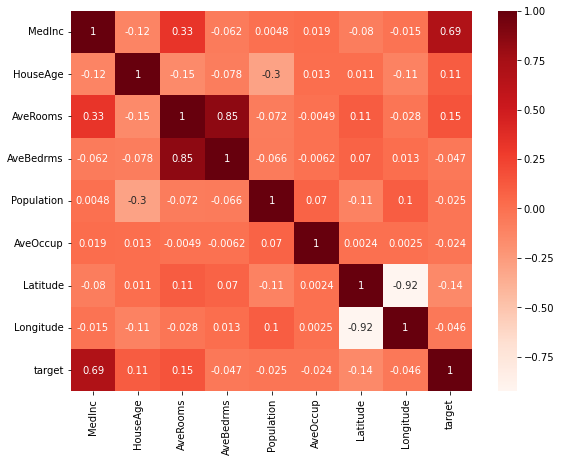

In [49]:
#correlation based feature selection

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
correlation_matrix = df_cali.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)

In [37]:
#seleting highly correlated features - correlation higher than 0.5
relevant_features = correlation_matrix['target'][abs(correlation_matrix['target'])>0.5]
relevant_features #only MedInc is highly correlated enough

MedInc    0.688075
target    1.000000
Name: target, dtype: float64

In [38]:
#seleting highly and weakly correlated features - correlation higher than 0.1
relevant_features = correlation_matrix['target'][abs(correlation_matrix['target'])>0.1]
relevant_features #MedInc, HouseAge, AveRooms, Latitude has been selected


MedInc      0.688075
HouseAge    0.105623
AveRooms    0.151948
Latitude   -0.144160
target      1.000000
Name: target, dtype: float64

In [ ]:
#